<a href="https://colab.research.google.com/github/MacsEli/DocumentosDeClase/blob/main/Bayesiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Conceptos básicos

La probabilidad de A dado B significa la probabiliad de que pase A una vez que ya sabemos que B pasó, se usa la notación
$$P(A|B)=\frac{P(A\cap B)}{P(B)}$$
Si despejamos podemos obtener $$P(A\cap B)=P(A|B)P(B)$$
$$P(B\cap A)=P(B|A)P(A)$$
Recordemos que dos eventos son independientes sii
$$P(A|B)=P(A)$$
Fijándonos en la ecuación de arriba eso resulta en 
$$P(A\cap B)=P(A)P(B)$$
El teorema de Bayes nos dice que 
$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

Un caso particular de ese teorema es cuando $A=A_1$ pertenece a una partición y podemos hacer
$$P(A_1|B)=\frac{P(B|A_1)P(A_1)}{P(B|A_1)P(A_1)+\cdots+P(B|A_n)P(A_n)}$$

---

#### Ejemplo cajas de galletas
Caja 1= 10 galletas de chocolate \\
Caja 2= 5 galletas de chocolate y 5 galletas de coco \\
Vamos a tomar una galleta sin ver y queremos obtener lo siguiente.

$P(Caja1 | Chocolate)$ \\
La probabilidad que la galleta obtenida sea de la caja1 si sabemos que es de chocolate


$P(Caja1 | Chocolate)=\frac{P(Chocolate|Caja1)P(Caja1)}{P(Chocolate)}$ \\
$P(Chocolate | Caja1)=1$ \\
$ P(Chocolate|Caja2)=1/2$ \\
La siguientes probas son 1/2 porque la galleta la tomamos de una caja sin ver \\
$P(Caja1)=1/2$ \\
$P(Caja2)=1/2$ \\
$P(Chocolate)=P(Chocolate|Caja1)P(Caja1) + P(Chocolate|Caja2)P(Caja2)=1*1/2+1/2*1/2=3/4$


$P(Caja1 | Chocolate)=\frac{1*1/2}{3/4}=4/6=2/3$

---

### Terminología Bayes
$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$
$P(A)$ priori. \\
$P(B|A)$ likelihood. \\
$P(B)$ marginal. \\
$P(A|B)$ posteriori. \\

In [ ]:
import numpy as np

In [ ]:
# Ejemplo de las galletas usando python
# priors = Probabilidad de que la galleta venga de cada caja
# likelihoods = Probabilidad de que la galleta sea de chocolate si la saque de cada caja
priors = [1/2, 1/2]
likelihoods = [1, 1/2]
#np.multiply(priors, likelihoods)=[1*1/2, 1/2*1/2]
def bayes(priors, likelihoods):

  #La marginal la calculamos como P(Chocolate|Caja1)P(Caja1) + P(Chocolate|Caja2)P(Caja2)
  #Es decir sumando el producto de priors por likelihoods emtrada por entrada
  marginal = sum(np.multiply(priors, likelihoods))

  #El numerador es una lista de la forma P(Chocolate|Cajai)P(Cajai) que usaremos para
  # calcular P(Cajai|Chocolate), aunque nosotros tenemos interés específicamente en
  # P(Caja1|Chocolate)
  num = np.multiply(priors, likelihoods)
  posteriori = np.divide(num, marginal)
  return posteriori

In [ ]:
# resultado = [proba de que sea caja 1 dado chocolate, proba de que sea caja 2 dado chocolate]
bayes(priors, likelihoods)

array([0.66666667, 0.33333333])

### Bayes en medicina
Primero veamos terminología que no será de utilidad un poco más adelante

![Sensib/especif](https://pbs.twimg.com/media/EV-bnxjUwAcZW_B.jpg)

Supongamos que tenemos una prueba que nos ayuda a identificar si una persona ha consumido o no alguna droga específica. \\
Sabiendo lo de arriba vamos a crear una función que nos ayude a calcular la probabilidad de que una persona consumiera drogas, dado que la prueba sale positiva, elgunas probabilidades importantes son:

---
$P(usuario | positivo)=\frac{P(positivo|usuario)P(usuario)}{P(postivo)}$ \\
$P(positivo)$ = P(positivo | usuario)*P(usuario) + P(positivo | no\; usuario)*P(no\; usuario) \\
$P(positivo | usuario)=$ Sensibilidad \\
$P(positivo | no\; usuario)=1-P(negativo | no\;usuario)$ \\
$P(negativo | no\;usuario)$ =Especificidad \\
$P(usuario)=$ Prevalencia


In [ ]:
# sensibilidad = porcentaje reales positivos
# especifidad = porcentaje de reales negativos
# prevalencia = que tan probable es que una persona sea usario al hacerse la prueba

# El verbose será usado solo para ver si queremos o no el print al correr la función
# Flag va a ser qué probabilidad de que sea usuario mínima queremos para afirmar que es usuario(print)
def proba_usuario(flag = 0.5, sensibilidad = 0.99, especificidad = 0.99, preval = 0.01, verbose = False):
  
  prob_usuario = preval
  prob_no_usuario = 1 - preval

  prob_positivo_usuario = sensibilidad
  prob_negativo_no_usuario = especificidad
  prob_negativo_usuario = 1-sensibilidad
  prob_positivo_no_usuario = 1-especificidad

  #Aplicamos probabilidad global (desglosamos la proba como arriba)
  prob_positivo = prob_positivo_usuario*prob_usuario + prob_positivo_no_usuario*prob_no_usuario

  #Es la parte de arriba de la fracción que escribimos arriba en el teorema de bayes
  num = prob_positivo_usuario*prob_usuario
  proba_posteriori = num/prob_positivo

  if verbose:
    if proba_posteriori>flag:
      print('Si es usuario! Agarralo')
    else:
      print('Dale calma fue falso positivo')
  return proba_posteriori

In [ ]:
import matplotlib.pyplot as plt

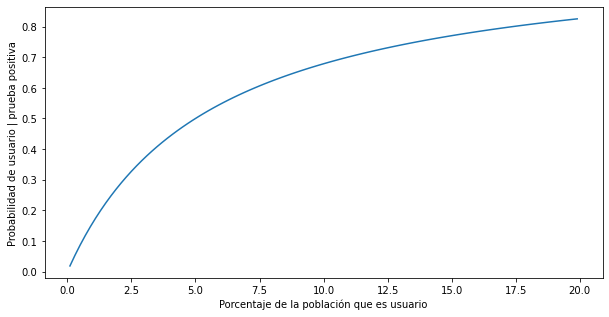

In [ ]:
# Vamos a ver qué pasa si dejamos la sensibilidad y especificidad fija y variamos la prevalencia
# Lo que estamos viendo en el eje y es: si la prueba sale positiva entonces qué tan probable es que
# efectivamente sea usuario
#Recordando que la prevalencia es la probabilidad de que la persona sea usuario antes de ver los resultados
# de la prueba
probabilidades = []
prevalencias = []
for preva in [i*.001 for i in range(1,201,2)]:
    prevalencias.append(preva*100)
    p=proba_usuario(sensibilidad = 0.95, especificidad = 0.95, preval = preva)
    probabilidades.append(p)
plt.figure(figsize=(10, 5),facecolor='w')
plt.plot(prevalencias, probabilidades)
plt.xlabel('Porcentaje de la población que es usuario')
plt.ylabel('Probabilidad de usuario | prueba positiva')
plt.show()

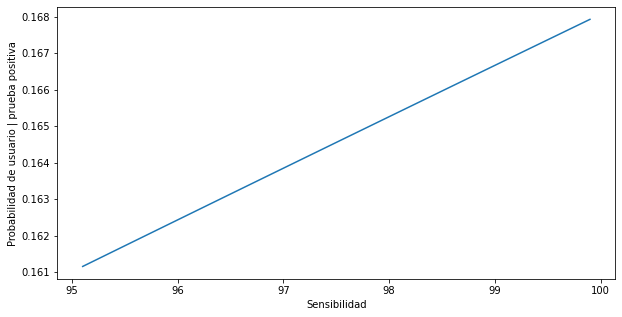

In [ ]:
# Igual que arriba pero ahora fijamos la especificidad y prevalencia y variamos la sensibilidad
# Recordando que las sensibilidad es que si alguien es usuario qué tan probable es que la prueba salga positivo
probabilidades = []
sensibilidades = []
for sensib in [i*.001+0.95 for i in range(1,51,2)]:
    sensibilidades.append(sensib*100)
    p=proba_usuario(sensibilidad = sensib, especificidad = 0.95, preval = 0.01)
    probabilidades.append(p)
plt.figure(figsize=(10, 5),facecolor='w')
plt.plot(sensibilidades, probabilidades)
plt.xlabel('Sensibilidad')
plt.ylabel('Probabilidad de usuario | prueba positiva')
plt.show()

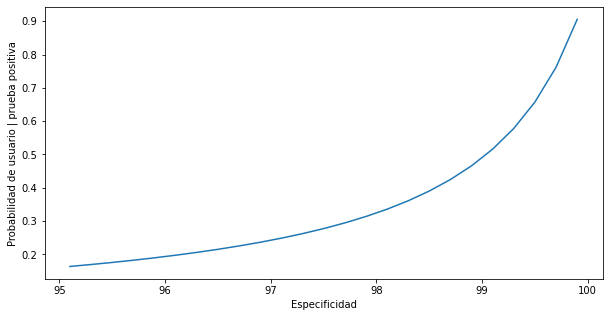

In [ ]:
# Igual que arriba pero ahora fijamos la sensibilidad y prevalencia y variamos la especificidad
# Recordando que las especificidad es que si alguien no es usuario qué tan probable es que la prueba salga negativo
probabilidades = []
especificidades = []
for especif in [i*.001+0.95 for i in range(1,51,2)]:
    especificidades.append(especif*100)
    p=proba_usuario(sensibilidad = 0.95, especificidad = especif, preval = 0.01)
    probabilidades.append(p)
plt.figure(figsize=(10, 5),facecolor='w')
plt.plot(especificidades, probabilidades)
plt.xlabel('Especificidad')
plt.ylabel('Probabilidad de usuario | prueba positiva')
plt.show()

In [ ]:
# Hicimos una prueba y salió positivo, entonces según lo parámetros iniciales hay
# un 8% de probabilidad que sea usuario
p1 = proba_usuario(sensibilidad=0.95, especificidad=0.95, preval=0.005, verbose=True)
p1

Dale calma fue falso positivo


0.08715596330275223

In [ ]:
# Se hace segunda prueba sabiendo que nuestra prevalencia ahora cambia porque
# ya tuvimos una prueba positiva entonces la probabilidad de que sea usuario antes
# de la segunda prueba es de 8% y no de .5% como era inicialmente.
# Si esta segunda prueba salió postivo entonces hay un 64% de probabilidad que sea usuario
p2 = proba_usuario(sensibilidad = 0.95, especificidad=0.95, preval=p1, verbose=True)
p2

Si es usuario! Agarralo


0.6446428571428567

Estadística bayesiana en la vida real trata de estimar algún parámetro con una distribución conocida usando muestras observadas para actualizar la distribución de dicho parámetro

Suppose we have just launched an online store that sells fidget spinners, and we are trying to estimate what percentage of visitors to our online store will make a purchase.

Prior to seeing any traffic or purchase data, we have no idea what to expect so we will start with the assumption that all percentages are equally likely. This is called a uniform prior because we can use a uniform distribution to represent the fact that every rate has an equal chance of being the actual rate of purchase. To set this up in Python, we are going to use Numpy to generate a uniform distribution from 100,000 random draws of numbers between 0 and 1.

Binomial(n,p) \\
En este caso nuestro parámetro que estimaremos es p, ya depende del programmador saber qué siginifica, en caso de la binomial es la probabilidad de que un usuario compr

In [ ]:
import pandas as pd

In [ ]:
n_draws=100000
prior = pd.Series(np.random.uniform(0,1, size=n_draws))

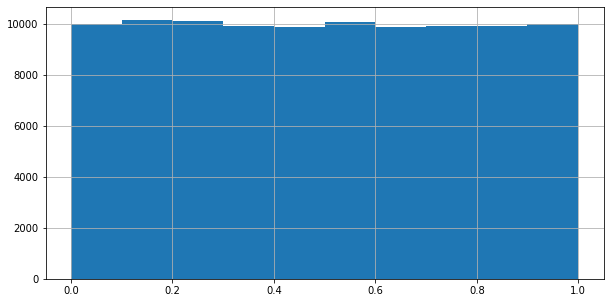

In [ ]:
plt.figure(figsize=(10,5),facecolor='w')
prior.hist();

In [ ]:
def generative_model(param):
  # 50 bots
  result = np.random.binomial(50, param)
  return result

In [ ]:
compraron = list()
for p in prior:
  compraron.append(generative_model(p))

In [ ]:
prior[:10]

0    0.268480
1    0.006106
2    0.455809
3    0.432499
4    0.341297
5    0.889194
6    0.994681
7    0.686530
8    0.628469
9    0.767906
dtype: float64

In [ ]:
compraron[:10]

[12, 0, 24, 19, 16, 43, 50, 38, 29, 37]

In [ ]:
# Observe que un día de 50 personas que visitaron compraron 10
posterior = prior[list(map(lambda x: x == 10, compraron))]

In [ ]:
compraron[90]

10

In [ ]:
posterior

90       0.258085
106      0.169216
153      0.132937
174      0.130564
221      0.218454
           ...   
99811    0.185137
99846    0.070634
99913    0.195729
99981    0.180270
99995    0.213744
Length: 2006, dtype: float64

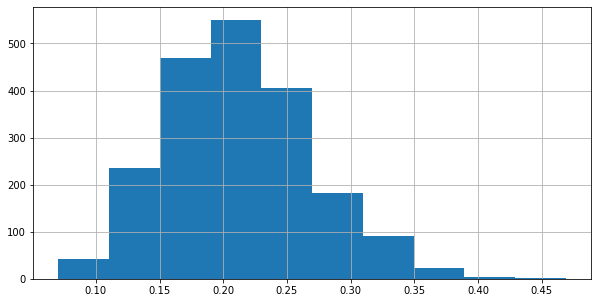

In [ ]:
plt.figure(figsize=(10,5),facecolor='w')
posterior.hist();

Una caseta cómo se comporta el número de conductores que pasan por ahí en una hora. Esto se comporta como una Poisson(lambda). \\
Sabemos porque hemos estado estudiando durante un año los datos con eso podemos modelas nuestra distribución inicial de nuestro lambda

In [ ]:
n_draws = 100000
prior = pd.Series(np.random.normal(15, 2, size=n_draws))

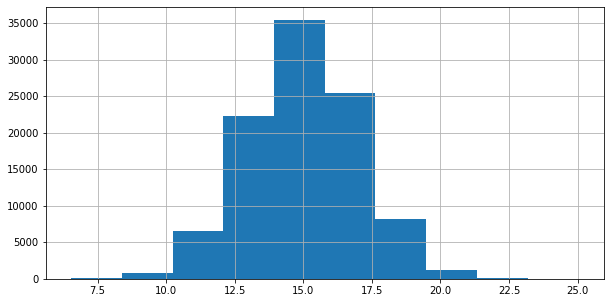

In [ ]:
plt.figure(figsize=(10,5),facecolor='w')
prior.hist()
plt.show()

In [ ]:
prior.head()

0    16.271175
1    11.895726
2    15.835444
3    15.691350
4    13.570281
dtype: float64

In [ ]:
prior.mean()

14.992784629712586

In [ ]:
def generative_model(param):
  result = np.random.poisson(param)
  return result

In [ ]:
pasaron = list()
for p in prior:
  pasaron.append(generative_model(p))

In [ ]:
generative_model(prior.head(1).values)

array([15])

In [ ]:
prior.head(1)

0    16.271175
dtype: float64

In [ ]:
pasaron[60:70]

[19, 8, 14, 14, 18, 16, 20, 14, 15, 11]

In [ ]:
# Un día observado pasaron en promedio 8 automóviles
posterior = prior[list(map(lambda x: x == 8, pasaron))]

In [ ]:
np.random.poisson(13.483,10)

array([11,  7,  7, 14, 13, 12, 13, 20, 14, 14])

In [ ]:
posterior

61       13.176253
169      13.277685
191      13.679026
282      14.562981
309      13.331229
           ...    
99802    17.095977
99819    13.078977
99837    13.261959
99953    13.537263
99963    10.174656
Length: 2619, dtype: float64

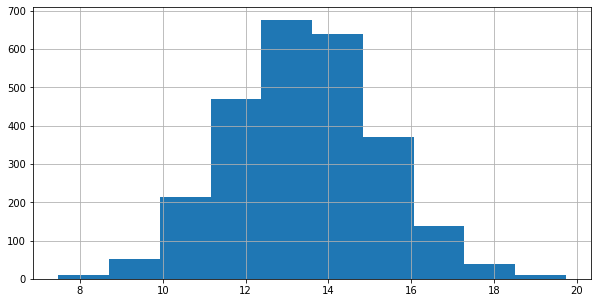

In [ ]:
plt.figure(figsize=(10,5),facecolor='w')
posterior.hist();

In [ ]:
posterior.describe()

count    2619.000000
mean       13.412460
std         1.804796
min         7.482631
25%        12.192331
50%        13.406187
75%        14.615621
max        19.726859
dtype: float64

In [ ]:
# Intervalo de confianza del 50%
print('(',posterior.quantile(0.25), ', ', posterior.quantile(0.75), ')')

( 12.192330617937975 ,  14.615620920525732 )


In [ ]:
# Intervalo de confianza del 95%
print('(',posterior.quantile(0.025), ', ', posterior.quantile(0.975), ')')

( 9.952480553411736 ,  16.957432095135275 )


In [ ]:
# Intervalo de confianza del 95%
print('( -inf, ', posterior.quantile(0.95), ')')

( -inf,  16.404468590415583 )


In [ ]:
# Intervalo de confianza del 95%
print('(',posterior.mean()-2*posterior.std(), ', ', posterior.mean()+2*posterior.std(), ')')

( 9.802868410670456 ,  17.02205121642572 )
